In [5]:
from datetime import datetime
import matplotlib.dates as mdates
import pandas as pd
import os
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

from matplotlib.ticker import *
import numpy as np
from datetime import datetime as dt

In [11]:
print(np.arange(0, 1.1, 0.1))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [9]:
fDir = input('Enter the path to the project directory: ')

vars = ['BX_GSE', 'BY_GSE', 'BZ_GSE', 'Vx', 'Vy', 'Vz', 'proton_density', 'T']
for n, v in enumerate(vars):
    print('{} - {}'.format(n, v))
varToPlot = input('Please enter variable to plot or specify "all" to generate distribution plots for all variables: ')

corrs = ['R', 'Rho', 'Tau', 'MAPE', 'RMSE', 'Ratio']
for n, c in enumerate(corrs):
    print('{} - {}'.format(n, c))
corrToPlot = input('Please enter the metric to plot or specify "all" to generate distribution plots for for all metrics: ')

0 - BX_GSE
1 - BY_GSE
2 - BZ_GSE
3 - Vx
4 - Vy
5 - Vz
6 - proton_density
7 - T
0 - R
1 - Rho
2 - Tau
3 - MAPE
4 - RMSE
5 - Ratio


In [ ]:
if varToPlot == 'all':
    print('placeholder')
    #stuff
elif int(varToPlot) < len(vars):
    path = os.path.join(fDir, 'Solar-Wind-Reliability/output-data/hourly-correlations/merged', vars[int(varToPlot)], 'output.csv')
    metricData = pd.read_csv(path, delimiter=',', header=0, index_col=0)
    print metricData
else:
    raise ValueError('Variable not in range or not "all".')

In [ ]:
import matplotlib.dates as mdates
import datetime as dt
from matplotlib.offsetbox import AnchoredText
fig = plt.figure(figsize=(20, 25), constrained_layout=True)
gs = gridspec.GridSpec(6, 4)



events = pd.read_csv('../eventlist/eventlist.csv', header=0)
events['time_start'] = pd.to_datetime(events['time_start'], format='%Y-%m-%dT%H:%M:%S.000Z')

for i,e in enumerate(events['time_start']):
    artemisData = pd.read_csv('../output-data/GSE/Artemis/Artemis_{}.csv'.format(e.strftime('%Y-%m-%d_%H-%M')), delimiter=',', header=0, index_col=0)
    omniData = pd.read_csv('../output-data/GSE/Omni/Omni_{}.csv'.format(e.strftime('%Y-%m-%d_%H-%M')), delimiter=',', header=0, index_col=0)

    artemisData['Time'] = pd.to_datetime(artemisData['Time'], format='%Y-%m-%d %H:%M:%S')
    omniData['Time'] = pd.to_datetime(omniData['Time'], format='%Y-%m-%d %H:%M:%S')

    gss = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[i], hspace=0.0)
    ax0 = fig.add_subplot(gss[0])
    ax1 = fig.add_subplot(gss[1], sharex=ax0)

    ax0.plot(artemisData['Time'], artemisData['BZ_GSE'])
    ax0.plot(omniData['Time'], omniData['BZ_GSE'])

    ax1.plot(artemisData['Time'], artemisData['BY_GSE'], label="ARTEMIS")
    ax1.plot(omniData['Time'], omniData['BY_GSE'], label="Omni")

    ax0.set_xlim((omniData['Time'][0], omniData['Time'][len(omniData['Time'])-1]))
    ax0.tick_params(axis="x", direction='in', labelbottom=0)
    ax0.set_ylabel("Bz")
    ax1.set_xlim((omniData['Time'][0], omniData['Time'][len(omniData['Time'])-1]))
    ax1.set_ylabel("By")
    #ax0.set_ylim((-10,10))
    #ax1.set_ylim((-10,10))
    ax1.xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=8))
    ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax0.xaxis.get_major_locator()))

plt.savefig('../output-data/allSeries.png', dpi=300)

/var/folders/qq/kxsxv0ks5j16hqtn13mpk4sw0000gn/T/ipykernel_13553/2286997984.py:39: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig('../output-data/allSeries.png', dpi=300)
/var/folders/qq/kxsxv0ks5j16hqtn13mpk4sw0000gn/T/ipykernel_13553/2286997984.py:39: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.savefig('../output-data/allSeries.png', dpi=300)
/Users/espen/anaconda3/envs/solarwind/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)
/Users/espen/anaconda3/envs/solarwind/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: AutoDateLocator was unable to pi

In [3]:
from matplotlib.offsetbox import AnchoredText

fig = plt.figure(figsize=(16, 25), constrained_layout=True)
gs = gridspec.GridSpec(6, 3)

events = pd.read_csv('../eventlist/eventlist.csv', header=0)
events['time_start'] = pd.to_datetime(events['time_start'], format='%Y-%m-%dT%H:%M:%S.000Z')

for i,e in enumerate(events['time_start']):
    pointsData = pd.read_csv('../output-data/hourly-correlations/Artemis_Omni_{}.csv'.format(e.strftime('%Y-%m-%d_%H-%M')), delimiter=',', header=0, index_col=0)

    #gss = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[i], hspace=0.0)
    ax = fig.add_subplot(gs[i])
    ax.scatter(pointsData['P(Bz)'], pointsData['P(By)'])
    ax.set_xlim((0,1))
    ax.set_ylim((0,1))

    text_box = AnchoredText(e.strftime('%Y-%m-%d %H-%M'), frameon=False, loc=4, pad=0)
    plt.setp(text_box.patch, facecolor='white', alpha=0.5)
    ax.add_artist(text_box)

FileNotFoundError: [Errno 2] No such file or directory: '../output-data/hourly-correlations/Artemis_Omni_2011-10-24_18-10.csv'

<Figure size 1600x2500 with 0 Axes>

In [ ]:
def open_csv(filePath):
    data = pd.read_csv(filePath, delimiter=',', header=0, index_col=0)
    print("Available data are: {}".format([col for col in data.columns]))
    return data

Text(0, 0.5, 'B$_y$ Coefficient')

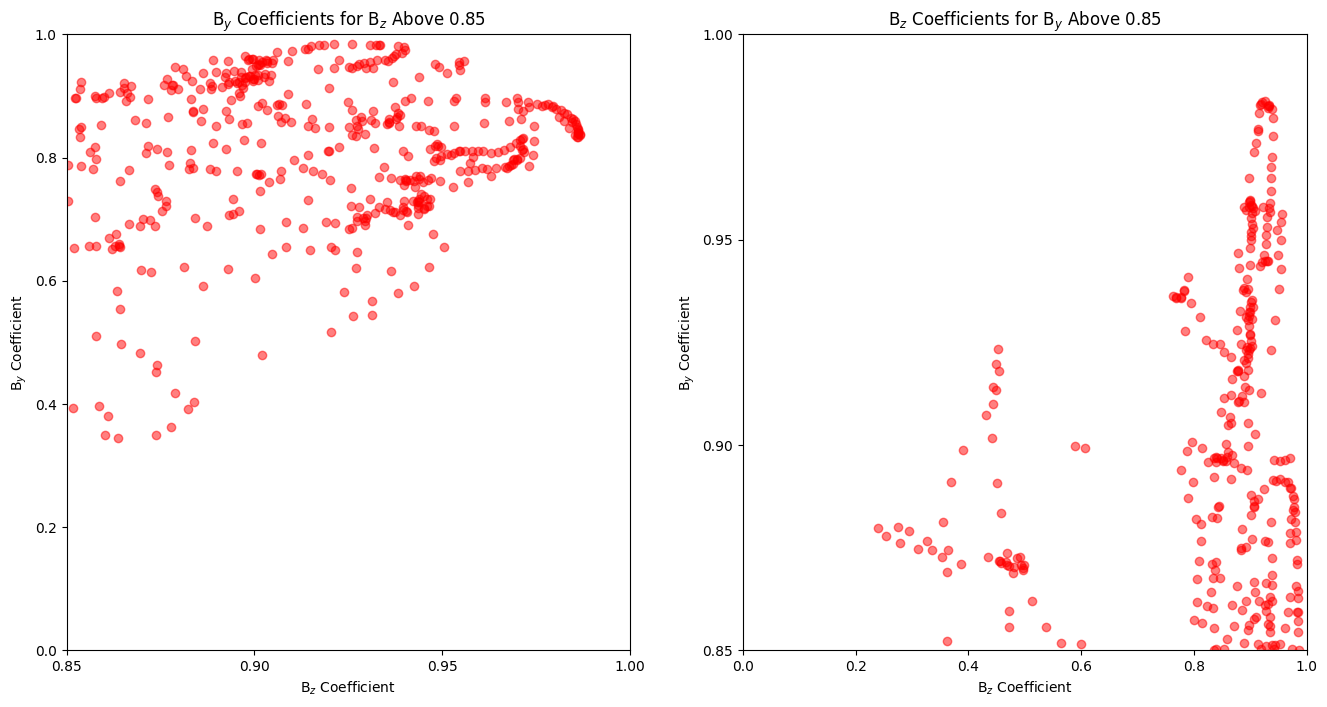

In [112]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
#ax.scatter(eventsData['P(Bz)'], eventsData['P(By)'], color='k', alpha=0.5)

valsAbove = [(x, y) for x,y in zip(eventsData['P(Bz)'],  eventsData['P(By)']) if x > 0.85]
vaX, vaY = zip(*valsAbove)
ax1.scatter(vaX, vaY, color='red', alpha=0.5)

ax1.set_xlim((0.85, 1))
ax1.set_ylim((0,1))

ax1.set_xticks(np.arange(0.85, 1.00, 0.05))
ax1.set_title(r"B$_y$ Coefficients for B$_z$ Above 0.85")
ax1.set_xlabel(r"B$_z$ Coefficient")
ax1.set_ylabel(r"B$_y$ Coefficient")

valsAbove = [(x, y) for x,y in zip(eventsData['P(Bz)'],  eventsData['P(By)']) if y > 0.85]
vaX, vaY = zip(*valsAbove)
ax2.scatter(vaX, vaY, color='red', alpha=0.5)

ax2.set_xlim((0, 1))
ax2.set_ylim((0.85,1))

ax2.set_yticks(np.arange(0.85, 1.00, 0.05))
ax2.set_title(r"B$_z$ Coefficients for B$_y$ Above 0.85")
ax2.set_xlabel(r"B$_z$ Coefficient")
ax2.set_ylabel(r"B$_y$ Coefficient")

In [5]:
eventsData = open_csv("../output-data/MergedEvents.csv")

Available data are: ['Start', 'Stop', 'P(Bx)', 'P(By)', 'P(Bz)', 'P(Vx)', 'P(Vy)', 'P(Vz)', 'P(n)', 'P(T)', 'pOffset (Bx)', 'pOffset (By)', 'pOffset (Bz)', 'pOffset (Vx)', 'pOffset (Vy)', 'pOffset (Vz)', 'pOffset (n)', 'pOffset (T)', 'R(Bx)', 'R(By)', 'R(Bz)', 'R(Vx)', 'R(Vy)', 'R(Vz)', 'R(n)', 'R(T)', 'rOffset (Bx)', 'rOffset (By)', 'rOffset (Bz)', 'rOffset (Vx)', 'rOffset (Vy)', 'rOffset (Vz)', 'rOffset (n)', 'rOffset (T)']


In [125]:

goodEventArtemis = open_csv("../output-data/Artemis/Artemis_2019-11-27_13-00.csv")
goodEventOmni = open_csv("../output-data/Omni/Omni_2019-11-27_13-00.csv")
goodEventArtemis['Time'] = pd.to_datetime(goodEventArtemis['Time'], format='%Y-%m-%d %H:%M:%S')
goodEventOmni['Time'] = pd.to_datetime(goodEventOmni['Time'], format='%Y-%m-%d %H:%M:%S')

"""a
goodEventArtemis = open_csv("../output-data/Artemis/Artemis_2017-09-27_04-30.csv")
goodEventOmni = open_csv("../output-data/Omni/Omni_2017-09-27_04-30.csv")
goodEventArtemis['Time'] = pd.to_datetime(goodEventArtemis['Time'], format='%Y-%m-%d %H:%M:%S')
goodEventOmni['Time'] = pd.to_datetime(goodEventOmni['Time'], format='%Y-%m-%d %H:%M:%S')
"""

"""
badByEventArtemis = open_csv("../output-data/Artemis/Artemis_2017-09-27_04-30.csv")
badByEventOmni = open_csv("../output-data/Omni/Omni_2017-09-27_04-30.csv")
badByEventArtemis['Time'] = pd.to_datetime(badByEventArtemis['Time'], format='%Y-%m-%d %H:%M:%S')
badByEventOmni['Time'] = pd.to_datetime(badByEventOmni['Time'], format='%Y-%m-%d %H:%M:%S')
"""
badByEventArtemis = open_csv("../output-data/Artemis/Artemis_2016-08-02_12-15.csv")
badByEventOmni = open_csv("../output-data/Omni/Omni_2016-08-02_12-15.csv")
badByEventArtemis['Time'] = pd.to_datetime(badByEventArtemis['Time'], format='%Y-%m-%d %H:%M:%S')
badByEventOmni['Time'] = pd.to_datetime(badByEventOmni['Time'], format='%Y-%m-%d %H:%M:%S')

"""
badByEventArtemis = open_csv("../output-data/Artemis/Artemis_2016-08-02_12-15.csv")
badByEventOmni = open_csv("../output-data/Omni/Omni_2016-08-02_12-15.csv")
badByEventArtemis['Time'] = pd.to_datetime(badByEventArtemis['Time'], format='%Y-%m-%d %H:%M:%S')
badByEventOmni['Time'] = pd.to_datetime(badByEventOmni['Time'], format='%Y-%m-%d %H:%M:%S')
"""


badBzEventArtemis = open_csv("../output-data/Artemis/Artemis_2018-10-09_04-00.csv")
badBzEventOmni = open_csv("../output-data/Omni/Omni_2018-10-09_04-00.csv")
badBzEventArtemis['Time'] = pd.to_datetime(badBzEventArtemis['Time'], format='%Y-%m-%d %H:%M:%S')
badBzEventOmni['Time'] = pd.to_datetime(badBzEventOmni['Time'], format='%Y-%m-%d %H:%M:%S')

Available data are: ['Time', 'BX_GSE', 'BY_GSE', 'BZ_GSE', 'Vx', 'Vy', 'Vz', 'proton_density', 'T']
Available data are: ['Time', 'BX_GSE', 'BY_GSE', 'BZ_GSE', 'Vx', 'Vy', 'Vz', 'proton_density', 'T']
Available data are: ['Time', 'BX_GSE', 'BY_GSE', 'BZ_GSE', 'Vx', 'Vy', 'Vz', 'proton_density', 'T']
Available data are: ['Time', 'BX_GSE', 'BY_GSE', 'BZ_GSE', 'Vx', 'Vy', 'Vz', 'proton_density', 'T']
Available data are: ['Time', 'BX_GSE', 'BY_GSE', 'BZ_GSE', 'Vx', 'Vy', 'Vz', 'proton_density', 'T']
Available data are: ['Time', 'BX_GSE', 'BY_GSE', 'BZ_GSE', 'Vx', 'Vy', 'Vz', 'proton_density', 'T']


In [8]:
badpoints = open_csv('../output-data/hourly-correlations/Artemis_Omni_2013-01-17_10-30.csv')

Available data are: ['Start', 'Stop', 'P(Bx)', 'P(By)', 'P(Bz)', 'P(Vx)', 'P(Vy)', 'P(Vz)', 'P(n)', 'P(T)', 'pOffset (Bx)', 'pOffset (By)', 'pOffset (Bz)', 'pOffset (Vx)', 'pOffset (Vy)', 'pOffset (Vz)', 'pOffset (n)', 'pOffset (T)', 'R(Bx)', 'R(By)', 'R(Bz)', 'R(Vx)', 'R(Vy)', 'R(Vz)', 'R(n)', 'R(T)', 'rOffset (Bx)', 'rOffset (By)', 'rOffset (Bz)', 'rOffset (Vx)', 'rOffset (Vy)', 'rOffset (Vz)', 'rOffset (n)', 'rOffset (T)']


/var/folders/r8/nn5k90kx62v517flg32_mpw40000gn/T/ipykernel_4451/1891129606.py:55: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig("../output-data/plots/threeexamples.png", dpi=300)
/Users/espen/sw-venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


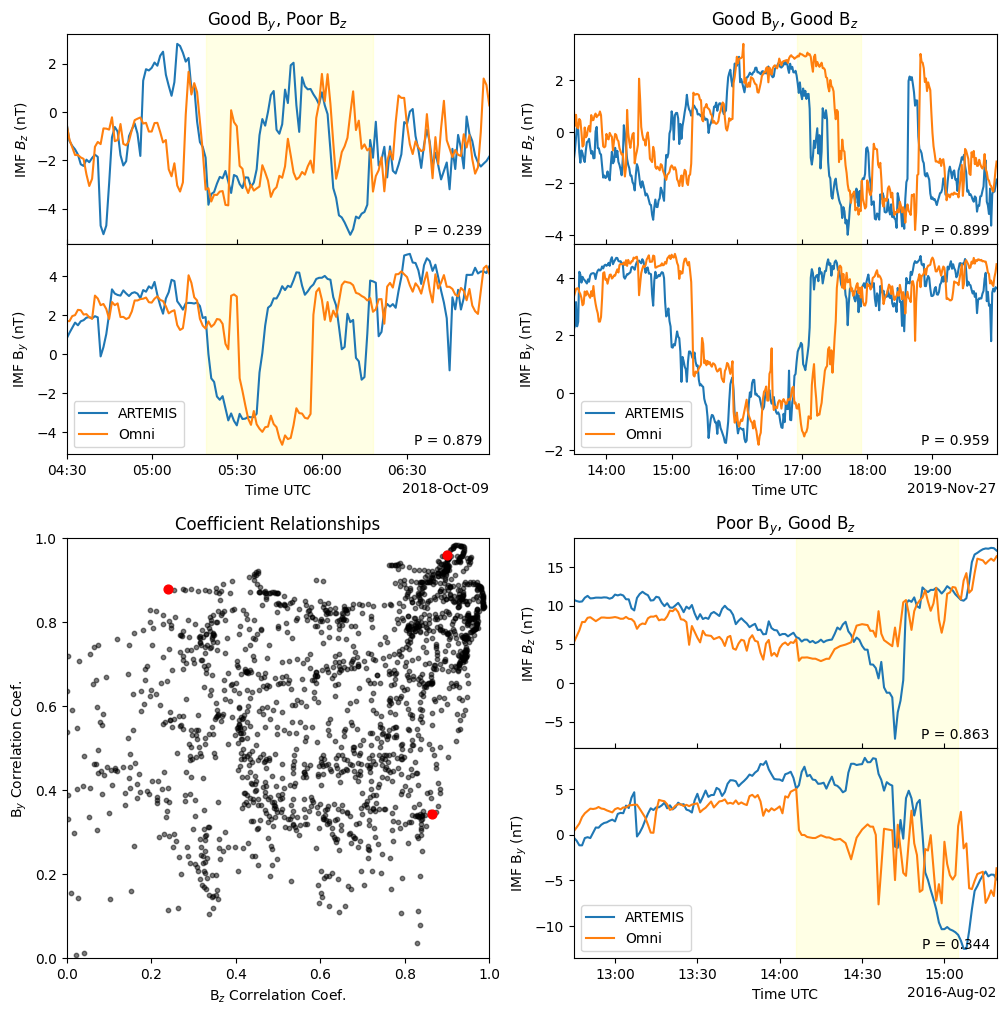

In [126]:
import matplotlib.dates as mdates
import datetime as dt
from matplotlib.offsetbox import AnchoredText
fig = plt.figure(figsize=(12, 12), constrained_layout=True)
gs = gridspec.GridSpec(2, 2)

plotList = [0, 1, 3]
artemisList = [badBzEventArtemis, goodEventArtemis, badByEventArtemis]
omniList = [badBzEventOmni, goodEventOmni, badByEventOmni]
highlight = [[dt.datetime(2018,10,9,5,19), dt.datetime(2018,10,9,6,18)], [dt.datetime(2019,11,27,16,55), dt.datetime(2019,11,27,17,54)], [dt.datetime(2016,8,2,14,6), dt.datetime(2016,8,2,15,5)]]
labels = [r"Good B$_y$, Poor B$_z$", r"Good B$_y$, Good B$_z$", r"Poor B$_y$, Good B$_z$"]
text = [["P = 0.239", "P = 0.879"], ["P = 0.899", "P = 0.959"], ["P = 0.863", "P = 0.344"]]

for plot, artemis, omni, interval, label, text in zip(plotList, artemisList, omniList, highlight, labels, text):
    gss = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[plot], hspace=0.0)
    ax0 = fig.add_subplot(gss[0])
    ax1 = fig.add_subplot(gss[1], sharex=ax0)

    ax0.axvspan(*mdates.date2num(interval), color='yellow', alpha=0.1)
    ax0.plot(artemis['Time'], artemis['BZ_GSE'])
    ax0.plot(omni['Time'], omni['BZ_GSE'])

    ax1.axvspan(*mdates.date2num(interval), color='yellow', alpha=0.1)
    ax1.plot(artemis['Time'], artemis['BY_GSE'], label="ARTEMIS")
    ax1.plot(omni['Time'], omni['BY_GSE'], label="Omni")

    ax0.set_xlim((omni['Time'][0], omni['Time'][len(omni['Time'])-1]))
    ax0.tick_params(axis="x", direction='in', labelbottom=0)
    ax0.set_ylabel(r"IMF $B_z$ (nT)")
    ax0.set_title(label)
    text_box = AnchoredText(text[0], frameon=False, loc=4, pad=0)
    plt.setp(text_box.patch, facecolor='white', alpha=0.5)
    ax0.add_artist(text_box)

    ax1.set_xlim((omni['Time'][0], omni['Time'][len(omni['Time'])-1]))
    ax1.xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=8))
    ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax0.xaxis.get_major_locator()))
    ax1.set_xlabel("Time UTC")
    ax1.set_ylabel(r"IMF B$_y$ (nT)")
    ax1.legend(loc="lower left")
    text_box = AnchoredText(text[1], frameon=False, loc=4, pad=0)
    plt.setp(text_box.patch, facecolor='white', alpha=0.5)
    ax1.add_artist(text_box)


gss = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[2], hspace=0.0)
ax = fig.add_subplot(gss[0])
make_scatter('../output-data/hourly-correlations', ax, xLabel=r"B$_z$ Correlation Coef.", yLabel=r"B$_y$ Correlation Coef.", title="Coefficient Relationships")

ax.scatter(0.899351848, 0.959699347, color='red', s=40)
#ax.scatter(0.926090506, 0.983664451, color='red', s=40)
ax.scatter(0.863595173, 0.344346969, color='red', s=40)
ax.scatter(0.239730938, 0.879679199, color='red', s=40)

plt.savefig("../output-data/plots/threeexamples.png", dpi=300)
plt.show()
